# Support Vector Machines on the ionosphere dataset
#### Mario Martin

We used this dataset in the Meta-methods notebook, so open it in another window to compare results with other methods.

In [1]:
import numpy as np                      # Llibreria matemÃ tica
import matplotlib.pyplot as plt         # Per mostrar plots
import sklearn                          # Llibreia de DM
import sklearn.datasets as ds           # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb          # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline              

In [2]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
# Para volver a montar reinciar el entorno de ejecución
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/md/parte2/svm/'
df = pd.read_csv("sample_5000_sin_outliers.csv")
df = df.iloc[:, 1:]

df.drop('artist_name', inplace=True, axis=1)
df.drop('track_name', inplace=True, axis=1)
df.drop('key', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)
df.dtypes

y = df['music_genre'].values
X = df.values[:,0:11].astype('float32')

Mounted at /content/drive
/content/drive/MyDrive/md/parte2/svm


Let's separate the data into training (for adjusting parameters), and validation. 

In [3]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.2, stratify = y, random_state=1)

Notice the stratification according to labels *y* that we demand in the spliting of data. The ionosphere dataset is small and with strarification we ensure we obtain the same proportion of examples of each class in training and test sets.

**Remember**. Data should be numerical and normalized or standarized before using an SVM. 

Normalization is not strictily necessary in our dataset because almost all 

1.   Elemento de lista
2.   Elemento de lista

columns are in range -1..1 (except columns 0 and 1)

In [ ]:
df.describe()

,popularity,duration_s,tempo,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000
mean,44.781454,236.709100,120.083074,0.462183,0.300586,0.562993,0.603308,0.058163,0.175114,-8.774093,0.075209
std,15.426828,75.192707,30.029057,0.248565,0.336872,0.178900,0.262023,0.130473,0.119605,5.369348,0.060522
min,0.000000,28.947000,47.704000,0.024100,0.000003,0.061300,0.000953,-0.035474,0.019400,-28.084000,0.023300
25%,35.000000,190.547000,95.438000,0.259000,0.020800,0.443000,0.442000,0.000000,0.095900,-10.714000,0.036600
50%,46.000000,225.947000,119.689000,0.453000,0.143000,0.574000,0.652000,0.000067,0.125000,-7.243000,0.048700
75%,56.000000,268.080000,140.083000,0.655000,0.535000,0.691000,0.810000,0.037100,0.224000,-5.156000,0.088700
max,90.000000,543.000000,216.029000,0.987000,0.996000,0.977000,0.999000,0.716000,0.679000,1.314000,0.289000


Next step is to normalize the data. Let's see how to do that properly:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear SVM

Let's try an SVM with default parameters. Linear means that we are not using any kernel to move the data to a higher dimensional space.

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[36  1  1  0 13  9  9  5  6 13]
 [ 2 51  9 16  4  6  0  1  0  3]
 [ 2 11 41  2 12  7  1 12  0  7]
 [ 1  2  2 71  1  2  0  6  0  1]
 [ 7  4 10  0 44  3  5  7  1 17]
 [11 12  5  2  5 50  3  5  0  3]
 [ 7  0  0  0  4  0 35  3 36 11]
 [ 3  4 12  6 10 13  2 42  1  3]
 [ 8  0  0  0  2  0 39  0 36 16]
 [10  1  0  0  6  1  3  2  9 64]]

Accuracy on test set:  0.4952581664910432


Not bad results. However, the linear SVM has parameter C that has to be adjusted. We will use *GridSearch* method to find the optimal value of C like we did in a previous notebook with the k value of the KNN algorithm.  

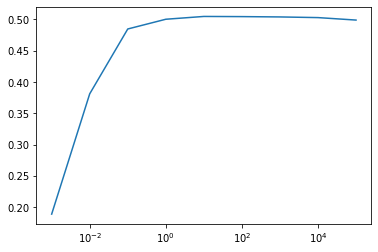

Acc. 3-fold cross on train data=  0.5044813119755912

Confusion matrix on test set:
 [[37  2  1  0 12  9 10  5  5 12]
 [ 2 51  9 15  4  7  0  1  0  3]
 [ 1 11 43  2 13  7  1 11  0  6]
 [ 1  3  3 71  1  2  0  4  0  1]
 [ 7  4 10  0 44  3  4  7  2 17]
 [11 10  6  2  6 50  3  5  0  3]
 [ 8  0  0  0  4  0 35  3 36 10]
 [ 4  4 12  6  9 14  2 40  1  4]
 [ 9  0  0  0  2  0 40  0 33 17]
 [11  1  0  0  6  1  2  2 11 62]]

Accuracy on test set:  0.4910432033719705

Best value of parameter C found:  {'C': 10.0}

Number of supports:  3271 ( 9418 of them have slacks)
Prop. of supports:  0.8616965226554267


In [ ]:
# List of C values to test. We usualy test diverse orders of magnitude
Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

# Let's plot the 3-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=5, scoring='accuracy')
print('Acc. 5-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


## RBF Kernel

There's another possibility for the kernel: The RBF kernel. This is the default kernel in the implementation of SVMs in sklearn, so we don't need to explicitely say the kernel used. Let's try it with default parameters.

In [ ]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[39  1  1  0 14  5 12  5  4 12]
 [ 2 47 11 15  5  7  0  2  0  3]
 [ 1  7 43  3 12  6  1 17  0  5]
 [ 2  1  2 76  1  0  0  4  0  0]
 [ 6  2 10  0 44  4  3  9  4 16]
 [ 9  9  6  1  6 54  2  5  1  3]
 [ 2  0  0  0  3  1 37  3 40 10]
 [ 4  2 10  6 11 14  3 44  1  1]
 [ 8  0  0  0  1  0 39  0 37 16]
 [13  1  0  0  4  1  4  4  7 62]]

Accuracy on test set:  0.5089567966280295


Promising performance for default parameters. But we have to search for the best parameters. In this case we have two parameters to adjust: the C parameter and the gamma parameter. We will find the best combination using the *GridSearch* method.

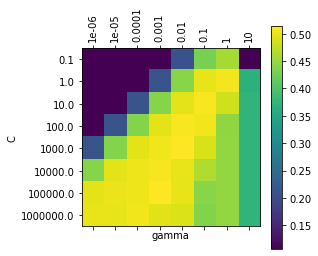


Best combination of parameters found:  {'C': 100000.0, 'gamma': 0.001}

Acc. 10-fold cross on train data=  0.5102714763543117


In [ ]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=5, scoring='accuracy')
print('\nAcc. 5-fold cross on train data= ', cvacc.mean())


This picture show for each combination of parameters the accuracy obtained in a 10-fold cross-validation. Notice the relation between C and gamma. 

Let's see the performance of the best parameters found on the test set.

In [ ]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[37  1  3  0 14  3 12  5  5 13]
 [ 2 50 11 14  5  6  0  1  0  3]
 [ 1  7 45  4 12  6  0 12  0  8]
 [ 2  3  2 73  1  0  0  5  0  0]
 [ 4  2 11  0 43  4  2  9  5 18]
 [ 8 14  4  1  7 51  1  5  2  3]
 [ 5  0  0  0  3  1 40  1 40  6]
 [ 4  3  9  4 12 18  2 41  1  2]
 [ 6  0  0  0  3  0 36  0 42 14]
 [13  1  0  0  4  1  4  2  8 63]]

Accuracy on test set:  0.5110642781875658

Number of supports:  3179 ( 7892 of them have slacks)
Prop. of supports:  0.8374604847207587


Wow. Best performance obtained so far using any method, even better than results obtained with meta-methods. 

**Observations about number and percentage of supports vectors:** 
It is know that percentage of supports of an SVM is a lower bound for the leave-one-out error. In general, an SVM with a lot of supports will be an overfitted SVM. A percentage of supports higher than 50% should be considered suspicious. If this happens, try to use other kernels. As a rule of thumb, a good SVM has a percentatge of supports vectors about 20-40% of the data (but that depends on a lot of things).

In our case all SVM have a low number of supports. And notice that the machine with a higher performance is the one with a lower number of supports (24.9%). That's not a coincidence but something common in SVMs.